In [47]:
import pandas as pd 
import numpy as numpy
import pylab as pl 
%matpotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


UsageError: Line magic function `%` not found.


In [5]:
df=pd.read_csv("ChurnData.csv")
df.head()


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [7]:
df.shape

(200, 28)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [ ]:
-LogisticRegression
-confusion_matrix

In [12]:
#split dataset in features and target variable
X= df.iloc[:,df.columns != "custcat"]
y=df.custcat

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
logreg = LogisticRegression()

In [38]:
logreg.fit(X_train, y_train)

c:\Users\90530\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = logreg.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 60.00%


In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 3  4  2  0]
 [ 3 10  1  1]
 [ 1  2  4  0]
 [ 0  0  2  7]]


In [44]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         1.0       0.43      0.33      0.38         9
         2.0       0.62      0.67      0.65        15
         3.0       0.44      0.57      0.50         7
         4.0       0.88      0.78      0.82         9

    accuracy                           0.60        40
   macro avg       0.59      0.59      0.59        40
weighted avg       0.61      0.60      0.60        40



In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

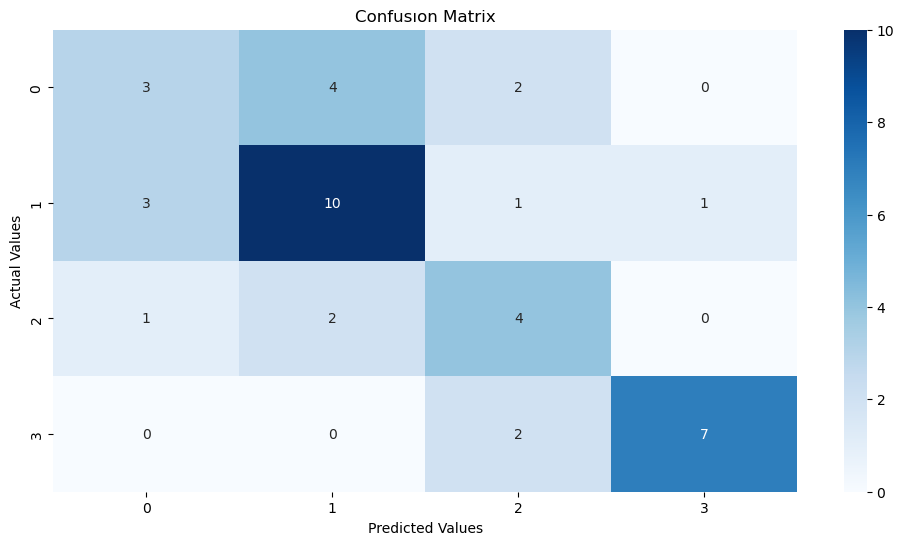

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusıon Matrix")
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)

# TP, TN, FP, FN değerlerini alma
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy)

0.65


### SOLUTİON